<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/3%EC%A3%BC%EC%B0%A8/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이번에는 weather.csv를 분류하는 모델입니다. 역시 다음을 기억하면서 진행합니다.
* 분류해야할 데이터를 파악합니다.
* 데이터의 형태를 파악합니다.
* 결측치의 존재 및 레이블 불균형을 확인합니다.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/weather.csv").dropna()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [5]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,268
Yes,60


Text(0.5, 1.0, 'RainTomorrow')

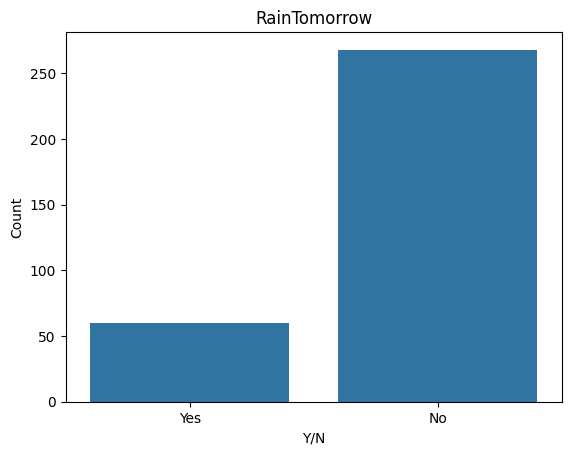

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="RainTomorrow")
plt.xlabel("Y/N")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("RainTomorrow")

In [7]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

아래 코드에 경우 문자들만 찾아서 숫자로 변환 시켰지만... 생각해보니까 소수점이 정수로 변해도 문제가 없었기에 그냥 df.columns로 돌려도 문제가 없었을 것 같다.

In [17]:
# 일부 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
transColumn = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for column in transColumn:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [18]:
X=df.drop(columns=['RainTomorrow'])
y=df["RainTomorrow"]

In [19]:
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,59,0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6
1,70,0,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6
2,81,0,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8
3,83,0,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8
4,84,0,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,9.0,30.7,0.0,7.6,12.1,6,76.0,10,7,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0
362,48,0,7.1,28.4,0.0,11.6,12.7,3,48.0,6,6,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0
363,49,0,12.5,19.9,0.0,8.4,5.3,2,43.0,1,1,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0
364,51,0,12.5,26.9,0.0,5.0,7.1,7,46.0,11,14,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0


In [20]:
y

,RainTomorrow
0,Yes
1,Yes
2,Yes
3,Yes
4,No
...,...
361,No
362,No
363,No
364,No


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((262, 23), (66, 23), (262,), (66,))

In [23]:
# -----------------------------
# 2) 모델 구성
# -----------------------------

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)

In [25]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [26]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [27]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 1.0000
[[54  0]
 [ 0 12]]
=== RF Test Accuracy ===
Random Forest : 1.0000
[[54  0]
 [ 0 12]]
=== LR Test Accuracy ===
Logistic Reg. : 0.9545
[[53  1]
 [ 2 10]]
